<a href="https://colab.research.google.com/github/lpenuelac/CDA_ProyectoEntrega2/blob/main/Modelo_Salud_del_Feto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Modelo





#### **Grupo**

*   Lorena Peñuela Cantor
*   Miguel Leon Garcia
*   Daniel Jimenez Riveros

**Objetivos:**







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas-profiling==2.7.1
#Instalar versión compatible de pandas profiling

     |████████████████████████████████| 252 kB 3.9 MB/s 
     |████████████████████████████████| 4.7 MB 40.1 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
     |████████████████████████████████| 675 kB 76.4 MB/s 
     |████████████████████████████████| 812 kB 44.0 MB/s 
     |████████████████████████████████| 38.2 MB 26 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=bb6cede492af829ca92c15d91cfe4a7b59c72c505651bc3e96c6c97f64fee7f2
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=24a6d3a78ac9174e1b19383c517c5541570b30285987b060144889fa49eedb08
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

In [ ]:
# Importar las librerías necesarias 
# Librería para manejo de datos
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
# Librerías para graficar
# El uso de plotly permite analizar los gráficos pasando el mouse sobre ellas
# también se puede redimensionar el gráfico a conveniencia
import plotly.express as px
# Gráficas estáticas
import matplotlib.pyplot as plt
plt.show()
import scipy.stats as stats
import statsmodels.api as sm
# Librería para perfilamiento
import pandas_profiling
import numpy as np
import pprint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import seaborn as sns
# check version number
from imblearn.over_sampling import SMOTE
#Prueba chi cuadrado
from  scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.pipeline import Pipeline

# **1. Lectura de Datos**

In [ ]:
# cargar los datos en csv
data= pd.read_csv('/content/drive/MyDrive/CDA_Proyecto/Entrega2/fetal_health.csv',
                  sep=',', #Parámetro de separación de datos
                  encoding='utf-8' #Codificación de datos
                 )
#visualizar los primeros registros
data.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# **2. Entendimiento de datos**
La idea es poder revisar los datos para saber la calidad que tienen para posteriormente generar un modelo

In [ ]:
perfilamiento=pandas_profiling.ProfileReport(data)
perfilamiento

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

# **3. Preparación de datos**


Se crea un gráfico de correlación para analizar las relaciones de la variable `fetal_health` vs las demás



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy



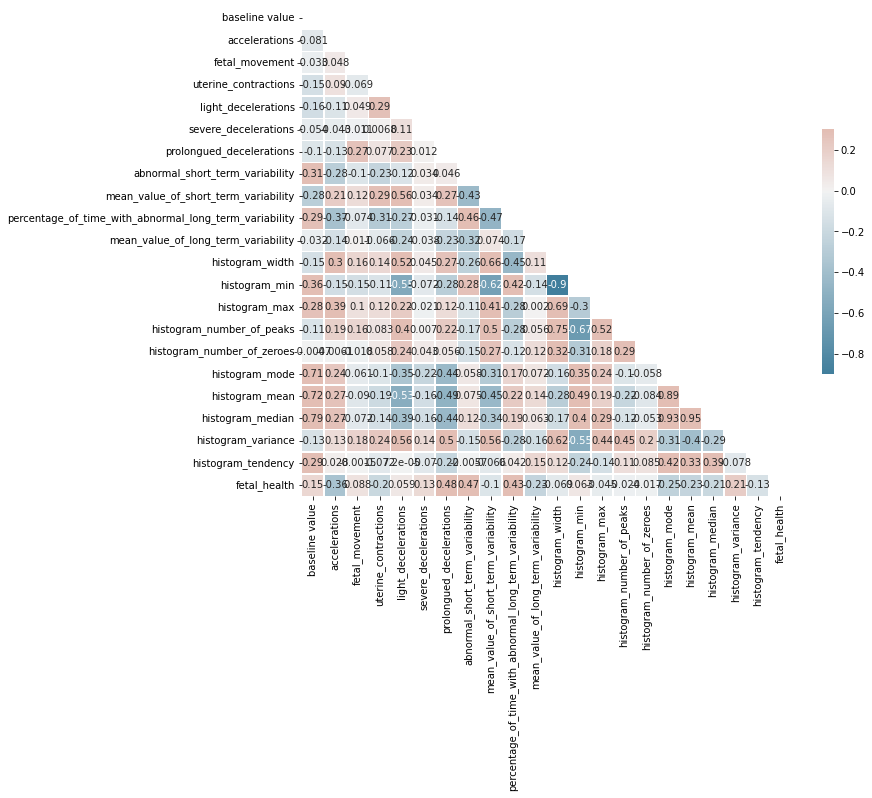

In [ ]:
%pylab inline
# Gráfico de correlación
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
data_new=data[["fetal_health","prolongued_decelerations","abnormal_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","baseline value"]]

In [ ]:
data_new.corr()

,fetal_health,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,baseline value
fetal_health,1.000000,0.484859,0.471191,0.426146,0.148151
prolongued_decelerations,0.484859,1.000000,0.046226,-0.137333,-0.104597
abnormal_short_term_variability,0.471191,0.046226,1.000000,0.459413,0.305570
percentage_of_time_with_abnormal_long_term_variability,0.426146,-0.137333,0.459413,1.000000,0.285630
baseline value,0.148151,-0.104597,0.305570,0.285630,1.000000


In [ ]:
#Data variables predictoras
#data=data[["prolongued_decelerations","abnormal_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","baseline value","fetal_health"]]


Se lleva a cabo un test Chi2 para entender la relación entre las variables categóricas Fetal_Health y Prolongued_decelerations

In [ ]:
data_grupos=pd.crosstab(data['fetal_health'], data['prolongued_decelerations'])
data_grupos

prolongued_decelerations,0.000,0.001,0.002,0.003,0.004,0.005
fetal_health,,,,,,
1.0,1586,54,14,1,0,0
2.0,280,5,7,3,0,0
3.0,82,11,51,20,9,3


In [ ]:
#Prueba Chi
kf = chi2_contingency(data_grupos)
kf

(735.2772982327443,
 1.6702243867228042e-151,
 10,
 array([[1.51643462e+03, 5.44920038e+01, 5.60489182e+01, 1.86829727e+01,
         7.00611477e+00, 2.33537159e+00],
        [2.70301035e+02, 9.71307620e+00, 9.99059266e+00, 3.33019755e+00,
         1.24882408e+00, 4.16274694e-01],
        [1.61264346e+02, 5.79492004e+00, 5.96048918e+00, 1.98682973e+00,
         7.45061148e-01, 2.48353716e-01]]))

In [ ]:
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=735.2773, p-value=0.0000, df=10 expected_frep=[[1.51643462e+03 5.44920038e+01 5.60489182e+01 1.86829727e+01
  7.00611477e+00 2.33537159e+00]
 [2.70301035e+02 9.71307620e+00 9.99059266e+00 3.33019755e+00
  1.24882408e+00 4.16274694e-01]
 [1.61264346e+02 5.79492004e+00 5.96048918e+00 1.98682973e+00
  7.45061148e-01 2.48353716e-01]]


Debido a que el valor p < 0.05, rechazamos la hipótesis nula y se acepta que las variables son dependientes

Se observa que no existen nulos por ende no es necesario hacer nada al respecto

In [ ]:
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Sin embargo si existen 13 valores duplicados, con el fin de tratar de generar el modelo se decide no eliminarlos, porque:


1.  La naturaleza de los datos pueden contener datos duplicados (Es posible que existan dos exámenes exactamente iguales por las medidas que se toman.
2.   Los datos duplicados representan menos del 1% de datos y contienen datos realos de clases desbalanceadas
3.  Más adelante se debe balancear el conjunto de datos, por ende existirán filas sinteticas con valores duplicados del dataset real



In [ ]:
#Valores duplicados
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,10.3,60.0,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,13.8,74.0,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,5.8,21.0,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,6.9,97.0,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,10.6,81.0,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,15.4,90.0,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,14.8,82.0,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,7.0,19.0,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,10.3,51.0,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [ ]:
data.shape

(2126, 22)

In [ ]:
frec_data=data['fetal_health'].value_counts().reset_index()
frec_data.head()

,index,fetal_health
0,1.0,1655
1,2.0,295
2,3.0,176


Como se observo anteriormente, contamos con un desbalanceo en las clases que puede afectar el modelo. Vamos a analizar este problema y su forma de resolverlo.

In [ ]:
y_original=data['fetal_health']
y_original.shape

(2126,)

In [ ]:
X_original=data.loc[:, ~data.columns.isin(['fetal_health'])]
X_original.shape

(2126, 21)

Se dividen los datos en Test(30%) y Training (70%) debido a que para entrenar el modelo se usará Cross validation y por ende no requerimos generar el conjunto de validación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=0)

Para entrenar el modelo se usa SMOTE (Synthetic Minority Oversampling Technique) de tal forma que permita tener más muestras de la clase menor, a diferencia del Bootstrap que nos ayuda con este mismo problema, SMOTE permite ajustar cada valor re-muestreado para evitar duplicados exactos de nuestros datos originales

In [ ]:
#Genera filas sinteticas de las clases con menor cantidad
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [ ]:
y.shape

(3483,)

In [ ]:
# Se observa que ahora todas las clases tiene la misma cantidad de datos (1655 valores - que coincide con la cantidad de la clase mayor: 1.0 - Normal)
df=pd.DataFrame(data=y)
df.value_counts()


fetal_health
3.0             1161
2.0             1161
1.0             1161
dtype: int64

No se usa transformación de datos debido a que todo el dataset cuenta con valores numéricos (como se requieren para modelar).
La normalización depende de los modelos a trabajar por ejemplo árboles de decisión y bosque aleatorio no requieren esto debido a que una característica nunca se compara con otra en magnitud, así que los rangos no importan.

# **4. Entrenar el modelo**


### **4.1 Random Forest**


In [ ]:
rfc = RandomForestClassifier()

Se usa `RandomizedSearchCV `para encontrar los mejores parámetros del modelo

In [ ]:
# Número de árboles
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Número de entidades a considerar en cada split
max_features = ['auto', 'sqrt']
# Número máximo de niveles del árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de muestras requeridas para dividir un nodo 
min_samples_split = [2, 5, 10]
# Número mínimo de muestras requeridas en cada hoja
min_samples_leaf = [1, 2, 4]
# Método de muestreo, en este caso se deja solo False al implementar SMOTE
bootstrap = [False]
# Grilla aleatoria
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint.pprint(random_grid)

{'bootstrap': [False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100]}


In [ ]:
#Con 5 folds
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# entrenar el modelo
rf_random.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 12, 23, 34, 45, 56,
                                                         67, 78, 89, 100]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 67}

Para este caso, apesar de tener la correlación de las variables, usaremos 
`SelectFromModel` para seleccionar las variables predictoras más relevantes, esto solo en el conjunto de datos de train para evitar sobreajuste



In [ ]:
#Generar modelo con los mejores parámetros y seleccionar las entidades que mejor explican la salud del feto
sl = SelectFromModel(RandomForestClassifier(**rf_random.best_params_))

In [ ]:
sl.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=False, max_depth=100,
                                                 max_features='sqrt',
                                                 min_samples_split=5,
                                                 n_estimators=67))

In [ ]:
sl.get_support()

array([False,  True, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False])

In [ ]:
X_train_all=pd.DataFrame(data=X, columns=X_train.columns)

In [ ]:
#Variables seleccionadas
selected_feat= X_train_all.columns[(sl.get_support())]
selected_feat

Index(['accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_mean',
       'histogram_median'],
      dtype='object')

In [ ]:
y.shape

(3483,)

In [ ]:
X_select_train=X_train_all[X_train_all.columns.intersection(selected_feat)]
X_select_train.shape

(3483, 8)

In [ ]:
#Entrenar modelo con variables seleccionadas
rfc_best=RandomForestClassifier(**rf_random.best_params_)
rfc_best.fit(X_select_train,y)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_split=5, n_estimators=67)

In [ ]:
rfc_best.score(X_select_train, y)

0.9994257823715188

In [ ]:
#Definir variables de test iguales a las usadas en el modelo
X_test_selected=X_test[X_test.columns.intersection(selected_feat)]
X_test_selected.shape

(638, 8)

In [ ]:
#Predecir datos de test
y_predicted=rfc_best.predict(X_test_selected)

### **4.2 Decision Tree**

In [ ]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
parameters={"splitter":["best","random"],
            "criterion" :["gini","entropy"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,5,7,9],
           "min_weight_fraction_leaf":[0.1,0.3,0.5,0.7,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,50,70,90] }

In [ ]:
tuning_model=GridSearchCV(clf,param_grid=parameters,scoring='accuracy',cv=3,verbose=1)

In [ ]:
tuning_model

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [

In [ ]:
tuning_model.fit(X,y)

In [ ]:
tuning_model.best_params_


{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 9,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 9,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}


In [ ]:
clf_train = DecisionTreeClassifier(criterion = "entropy",max_depth=5, min_samples_leaf=9,max_features="auto",max_leaf_nodes=10,min_weight_fraction_leaf=0.1,splitter="best")
clf_train

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf_train.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred(X,clf_train)[0:1]

Predicted values:
[1. 1. 1. ... 2. 3. 3.]


array([1.])

In [ ]:
# Función para calcular las métricas
def metricas(y, y_pred):
    print("Matriz de confusión: ",
        confusion_matrix(y, y_pred))
      
    print ("Precisión : ",
    accuracy_score(y,y_pred)*100)
      
    print("Reporte : ",
    classification_report(y, y_pred))

In [ ]:
#Realizar las comparaciones
metricas(y,pred(X,clf_train))

Predicted values:
[1. 1. 1. ... 2. 3. 3.]
Matriz de confusión:  [[872 127 162]
 [169 902  90]
 [117 230 814]]
Precisión :  74.30376112546655
Reporte :                precision    recall  f1-score   support

         1.0       0.75      0.75      0.75      1161
         2.0       0.72      0.78      0.75      1161
         3.0       0.76      0.70      0.73      1161

    accuracy                           0.74      3483
   macro avg       0.74      0.74      0.74      3483
weighted avg       0.74      0.74      0.74      3483



### **4.3 Regresión Logística**

In [ ]:
y_original_rl= y_original.apply(lambda x: 1 if (x == 1) else 2)

In [ ]:
y_original_rl.value_counts()

1    1655
2     471
Name: fetal_health, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original_rl, test_size=0.3, random_state=0)

In [ ]:
scaler=MinMaxScaler()
X_train_norm=scaler.fit_transform(X_train)

In [ ]:
steps=[('logReg',LogisticRegression(random_state=42))]

pipeline = Pipeline(steps)

param_4 = {'logReg__class_weight':['balanced'],
           'logReg__penalty': ['l2','none']}

grid_search = GridSearchCV(pipeline, param_grid=[param_4],cv=5,verbose=3,scoring='accuracy',error_score=0.0)

grid_search.fit(X_train_norm,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] logReg__class_weight=balanced, logReg__penalty=l2 ...............
[CV]  logReg__class_weight=balanced, logReg__penalty=l2, score=0.919, total=   0.0s
[CV] logReg__class_weight=balanced, logReg__penalty=l2 ...............
[CV]  logReg__class_weight=balanced, logReg__penalty=l2, score=0.856, total=   0.0s
[CV] logReg__class_weight=balanced, logReg__penalty=l2 ...............
[CV]  logReg__class_weight=balanced, logReg__penalty=l2, score=0.849, total=   0.0s
[CV] logReg__class_weight=balanced, logReg__penalty=l2 ...............
[CV]  logReg__class_weight=balanced, logReg__penalty=l2, score=0.896, total=   0.0s
[CV] logReg__class_weight=balanced, logReg__penalty=l2 ...............
[CV]  logReg__class_weight=balanced, logReg__penalty=l2, score=0.879, total=   0.0s
[CV] logReg__class_weight=balanced, logReg__penalty=none .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.o

[CV]  logReg__class_weight=balanced, logReg__penalty=none, score=0.899, total=   0.1s
[CV] logReg__class_weight=balanced, logReg__penalty=none .............
[CV]  logReg__class_weight=balanced, logReg__penalty=none, score=0.869, total=   0.1s
[CV] logReg__class_weight=balanced, logReg__penalty=none .............
[CV]  logReg__class_weight=balanced, logReg__penalty=none, score=0.869, total=   0.1s
[CV] logReg__class_weight=balanced, logReg__penalty=none .............
[CV]  logReg__class_weight=balanced, logReg__penalty=none, score=0.892, total=   0.1s
[CV] logReg__class_weight=balanced, logReg__penalty=none .............
[CV]  logReg__class_weight=balanced, logReg__penalty=none, score=0.896, total=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(memory=None,
                                steps=[('logReg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=42,
                                                

In [ ]:
grid_search.best_params_

{'logReg__class_weight': 'balanced', 'logReg__penalty': 'none'}

In [ ]:
#Generar modelo con los mejores parámetros y seleccionar las entidades que mejor explican la salud del feto
selector = SelectFromModel(estimator=LogisticRegression(class_weight='balanced')).fit(X_train_norm, y_train)

In [ ]:
selector.get_support()

array([ True,  True, False,  True, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False])

In [ ]:
#Variables seleccionadas
selected_feat= X_train.columns[(selector.get_support())]
selected_feat

Index(['baseline value', 'accelerations', 'uterine_contractions',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_variance'],
      dtype='object')

In [ ]:
X_select_train=X_train[X_train.columns.intersection(selected_feat)]
X_select_train.shape

(1488, 7)

In [ ]:
X_select_train_norm=scaler.fit_transform(X_select_train)

In [ ]:
#Entrenar modelo con variables seleccionadas
lr_best=LogisticRegression(class_weight='balanced')
lr_best.fit(X_select_train_norm,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_best.score(X_select_train_norm, y_train)

0.8891129032258065

In [ ]:
#Definir variables de test iguales a las usadas en el modelo
X_test_selected=X_test[X_test.columns.intersection(selected_feat)]
X_test_selected.shape

(638, 7)

In [ ]:
X_select_test_norm=scaler.fit_transform(X_test_selected)

In [ ]:
#Predecir datos de test
y_predicted_lr=lr_best.predict(X_select_test_norm)

# **5. Evaluar el modelo**

### **5.1 Random Forest**


In [ ]:
metricas(y_test,y_predicted)

Matriz de confusión:  [[477  13   4]
 [ 18  64   4]
 [  0   2  56]]
Precisión :  93.57366771159874
Reporte :                precision    recall  f1-score   support

         1.0       0.96      0.97      0.96       494
         2.0       0.81      0.74      0.78        86
         3.0       0.88      0.97      0.92        58

    accuracy                           0.94       638
   macro avg       0.88      0.89      0.89       638
weighted avg       0.93      0.94      0.93       638



In [ ]:
#Registro para probar en API
X_test_selected.iloc[0]


accelerations                                               0.001
prolongued_decelerations                                    0.000
abnormal_short_term_variability                            24.000
mean_value_of_short_term_variability                        1.200
percentage_of_time_with_abnormal_long_term_variability     12.000
mean_value_of_long_term_variability                         7.600
histogram_mean                                            133.000
histogram_median                                          135.000
Name: 658, dtype: float64

In [ ]:
rfc_best.feature_names = list(X_test_selected.columns.values)
rfc_best.feature_names

['accelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_mean',
 'histogram_median']

In [ ]:
#Guardar el modelo
import joblib
path="/content/drive/MyDrive/CDA_Proyecto/Entrega2/"
joblib_file = path+"model.joblib"
joblib.dump(rfc_best, joblib_file) 

['/content/drive/MyDrive/CDA_Proyecto/Entrega2/model.joblib']

### **5.2 Tree Desicion**

In [ ]:
pred(X_test,clf_train)[0:1]

Predicted values:
[1. 1. 3. 2. 2. 1. 3. 1. 1. 1. 3. 1. 1. 3. 3. 1. 1. 2. 1. 2. 1. 2. 1. 3.
 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 3. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 3. 1. 1. 1. 2. 1. 2. 3. 1. 1. 1. 2. 2.
 2. 3. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 1. 2. 1. 1. 3. 3. 2. 2. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 3. 2. 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 2. 2. 3. 1. 2. 1. 1. 3. 1. 2. 1. 2.
 2. 2. 3. 1. 1. 1. 1. 1. 2. 2. 3. 1. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 3. 3. 1. 2. 1. 1. 3.
 1. 1. 1. 2. 3. 1. 1. 3. 2. 1. 3. 2. 1. 1. 2. 3. 1. 2. 1. 1. 3. 3. 2. 1.
 1. 3. 2. 1. 1. 1. 3. 1. 1. 2. 1. 1. 3. 1. 1. 2. 1. 1. 1. 3. 3. 2. 1. 1.
 2. 3. 1. 1. 1. 1. 1. 1. 3. 3. 2. 1. 3. 1. 1. 2. 3. 1. 1. 3. 2. 3. 1. 1.
 1. 2. 1. 1. 1. 3. 1. 2. 1. 3. 1. 1. 1. 2. 2. 3. 1. 3. 3. 3. 1. 1. 3. 3.
 1. 2. 1. 1. 2. 3. 1. 1. 3. 1. 3. 3. 1. 2. 1. 3. 1. 3. 1. 2. 2. 3. 1. 1.
 1. 1. 2. 2. 2. 1. 1. 3. 1. 1. 2.

array([1.])

In [ ]:
# Función para calcular las métricas
def metricas(y_test, y_pred):
    print("Matriz de confusión: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Precisión : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Reporte : ",
    classification_report(y_test, y_pred))

In [ ]:
#Realizar las comparaciones
metricas(y_test,pred(X_test,clf_train))

Predicted values:
[1. 1. 3. 2. 2. 1. 3. 1. 1. 1. 3. 1. 1. 3. 3. 1. 1. 2. 1. 2. 1. 2. 1. 3.
 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 3. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 3. 1. 1. 1. 2. 1. 2. 3. 1. 1. 1. 2. 2.
 2. 3. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 1. 2. 1. 1. 3. 3. 2. 2. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 3. 2. 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 2. 2. 3. 1. 2. 1. 1. 3. 1. 2. 1. 2.
 2. 2. 3. 1. 1. 1. 1. 1. 2. 2. 3. 1. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 3. 3. 1. 2. 1. 1. 3.
 1. 1. 1. 2. 3. 1. 1. 3. 2. 1. 3. 2. 1. 1. 2. 3. 1. 2. 1. 1. 3. 3. 2. 1.
 1. 3. 2. 1. 1. 1. 3. 1. 1. 2. 1. 1. 3. 1. 1. 2. 1. 1. 1. 3. 3. 2. 1. 1.
 2. 3. 1. 1. 1. 1. 1. 1. 3. 3. 2. 1. 3. 1. 1. 2. 3. 1. 1. 3. 2. 3. 1. 1.
 1. 2. 1. 1. 1. 3. 1. 2. 1. 3. 1. 1. 1. 2. 2. 3. 1. 3. 3. 3. 1. 1. 3. 3.
 1. 2. 1. 1. 2. 3. 1. 1. 3. 1. 3. 3. 1. 2. 1. 3. 1. 3. 1. 2. 2. 3. 1. 1.
 1. 1. 2. 2. 2. 1. 1. 3. 1. 1. 2.

### **5.3 Regresión Logística**

In [ ]:
def metricas(y_test, y_pred):
    print("Matriz de confusión: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Precisión : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Reporte : ",
    classification_report(y_test, y_pred))

In [ ]:
metricas(y_test,y_predicted_lr)

Matriz de confusión:  [[427  67]
 [ 23 121]]
Precisión :  85.8934169278997
Reporte :                precision    recall  f1-score   support

           1       0.95      0.86      0.90       494
           2       0.64      0.84      0.73       144

    accuracy                           0.86       638
   macro avg       0.80      0.85      0.82       638
weighted avg       0.88      0.86      0.86       638

